In [1]:
!nvidia-smi

Fri Jul 23 18:23:57 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install -qqq git+https://github.com/albumentations-team/albumentations.git
!pip install -qqq torchsummary

In [3]:
!git clone https://github.com/hassiahk/train-your-model-pytorch.git

Cloning into 'train-your-model-pytorch'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 102 (delta 52), reused 76 (delta 29), pack-reused 0
Receiving objects: 100% (102/102), 20.21 KiB | 10.10 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [4]:
%cd train-your-model-pytorch/

/content/train-your-model-pytorch


In [5]:
from utils.helper import seed_everything, get_default_device, calculate_mean_std
seed_everything(42)

In [6]:
mean, std = calculate_mean_std("TinyImageNet")
mean, std

((0.4802, 0.4481, 0.3975), (0.2302, 0.2265, 0.2262))

In [7]:
from utils.transforms import apply_transforms_tiny_imagenet
train_transforms, test_transforms = apply_transforms_tiny_imagenet(mean, std)

In [8]:
from utils.dataset import TinyImageNet

train_dataset = TinyImageNet(root='data/', train=True, download=True, transform=train_transforms)
test_dataset = TinyImageNet(root='data/', train=False, download=False, transform=test_transforms)

In [9]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train_dataset, batch_size=512, shuffle=True, pin_memory=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=512, shuffle=False, pin_memory=True, num_workers=2)

In [10]:
labels = train_dataset.classes
labels[:10]

['Egyptian cat',
 'reel',
 'volleyball',
 'rocking chair',
 'lemon',
 'bullfrog',
 'basketball',
 'cliff',
 'espresso',
 'plunger']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

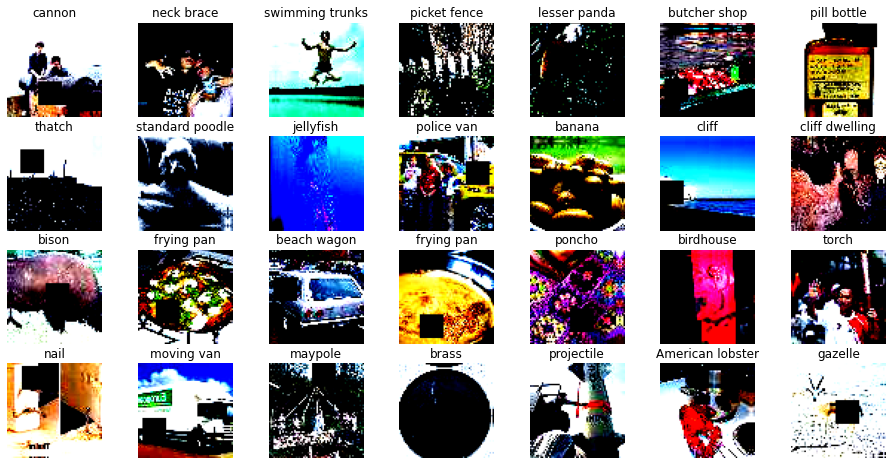

In [11]:
from utils.plot_utils import show_batch

show_batch(train_loader, labels)

In [12]:
device = get_default_device()
device

device(type='cuda')

In [13]:
from models.resnet18 import resnet18
from utils.helper import model_summary

model = resnet18("BN").to(device)

model_summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 64, 64]           1,728
       BatchNorm2d-2           [-1, 64, 64, 64]             128
            Conv2d-3           [-1, 64, 64, 64]          36,864
       BatchNorm2d-4           [-1, 64, 64, 64]             128
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
        BasicBlock-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
           Conv2d-10           [-1, 64, 64, 64]          36,864
      BatchNorm2d-11           [-1, 64, 64, 64]             128
       BasicBlock-12           [-1, 64, 64, 64]               0
           Conv2d-13          [-1, 128, 32, 32]          73,728
      BatchNorm2d-14          [-1, 128,

In [14]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

epochs = 50
lr = 0.01
l1_factor = 0

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9, weight_decay = 0.005)
criterion = nn.CrossEntropyLoss()

In [15]:
from main import trainer

train_accuracy, train_losses, test_accuracy, test_losses = trainer(model, epochs, device, train_loader, test_loader, optimizer, criterion, l1_factor, lr)

  0%|          | 0/151 [00:00<?, ?it/s]

Epoch 1:


Train Loss=5.118628025054932 Batch_id=150 LR= 0.00050 Train Accuracy= 2.00: 100%|██████████| 151/151 [02:56<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0100, Test Accuracy: 1257/33000 (3.81%)

Epoch 2:


Train Loss=4.900865077972412 Batch_id=150 LR= 0.00082 Train Accuracy= 4.93: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0094, Test Accuracy: 1922/33000 (5.82%)

Epoch 3:


Train Loss=4.463602066040039 Batch_id=150 LR= 0.00132 Train Accuracy= 7.30: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0089, Test Accuracy: 2647/33000 (8.02%)

Epoch 4:


Train Loss=4.232998371124268 Batch_id=150 LR= 0.00199 Train Accuracy= 10.37: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0085, Test Accuracy: 3247/33000 (9.84%)

Epoch 5:


Train Loss=4.074293613433838 Batch_id=150 LR= 0.00280 Train Accuracy= 13.51: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0080, Test Accuracy: 4283/33000 (12.98%)

Epoch 6:


Train Loss=3.6903960704803467 Batch_id=150 LR= 0.00372 Train Accuracy= 16.74: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0080, Test Accuracy: 4197/33000 (12.72%)

Epoch 7:


Train Loss=3.533226728439331 Batch_id=150 LR= 0.00470 Train Accuracy= 19.78: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0076, Test Accuracy: 5368/33000 (16.27%)

Epoch 8:


Train Loss=3.4035165309906006 Batch_id=150 LR= 0.00571 Train Accuracy= 22.52: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0072, Test Accuracy: 6050/33000 (18.33%)

Epoch 9:


Train Loss=3.2314541339874268 Batch_id=150 LR= 0.00669 Train Accuracy= 24.94: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0072, Test Accuracy: 6389/33000 (19.36%)

Epoch 10:


Train Loss=3.0762135982513428 Batch_id=150 LR= 0.00760 Train Accuracy= 27.26: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0071, Test Accuracy: 6796/33000 (20.59%)

Epoch 11:


Train Loss=3.0396978855133057 Batch_id=150 LR= 0.00842 Train Accuracy= 29.56: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0066, Test Accuracy: 7956/33000 (24.11%)

Epoch 12:


Train Loss=2.8814902305603027 Batch_id=150 LR= 0.00909 Train Accuracy= 31.69: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0070, Test Accuracy: 7107/33000 (21.54%)

Epoch 13:


Train Loss=2.788417100906372 Batch_id=150 LR= 0.00959 Train Accuracy= 33.63: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0063, Test Accuracy: 8830/33000 (26.76%)

Epoch 14:


Train Loss=2.727015972137451 Batch_id=150 LR= 0.00990 Train Accuracy= 35.51: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0062, Test Accuracy: 9088/33000 (27.54%)

Epoch 15:


Train Loss=2.6488027572631836 Batch_id=150 LR= 0.01000 Train Accuracy= 37.04: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0059, Test Accuracy: 9975/33000 (30.23%)

Epoch 16:


Train Loss=2.6393532752990723 Batch_id=150 LR= 0.00998 Train Accuracy= 38.59: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0061, Test Accuracy: 9285/33000 (28.14%)

Epoch 17:


Train Loss=2.4910478591918945 Batch_id=150 LR= 0.00992 Train Accuracy= 40.09: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0062, Test Accuracy: 9273/33000 (28.10%)

Epoch 18:


Train Loss=2.364811658859253 Batch_id=150 LR= 0.00982 Train Accuracy= 41.25: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0055, Test Accuracy: 11262/33000 (34.13%)

Epoch 19:


Train Loss=2.443133592605591 Batch_id=150 LR= 0.00968 Train Accuracy= 42.65: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0070, Test Accuracy: 7756/33000 (23.50%)

Epoch 20:


Train Loss=2.3617641925811768 Batch_id=150 LR= 0.00950 Train Accuracy= 43.70: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0061, Test Accuracy: 9429/33000 (28.57%)

Epoch 21:


Train Loss=2.5012848377227783 Batch_id=150 LR= 0.00929 Train Accuracy= 44.96: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0062, Test Accuracy: 9407/33000 (28.51%)

Epoch 22:


Train Loss=2.28644061088562 Batch_id=150 LR= 0.00904 Train Accuracy= 45.86: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0056, Test Accuracy: 10977/33000 (33.26%)

Epoch 23:


Train Loss=2.165268898010254 Batch_id=150 LR= 0.00876 Train Accuracy= 46.96: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0052, Test Accuracy: 12405/33000 (37.59%)

Epoch 24:


Train Loss=2.0801053047180176 Batch_id=150 LR= 0.00845 Train Accuracy= 48.20: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0055, Test Accuracy: 11517/33000 (34.90%)

Epoch 25:


Train Loss=2.2502641677856445 Batch_id=150 LR= 0.00812 Train Accuracy= 49.18: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0057, Test Accuracy: 10629/33000 (32.21%)

Epoch 26:


Train Loss=2.055776596069336 Batch_id=150 LR= 0.00775 Train Accuracy= 50.03: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0056, Test Accuracy: 11171/33000 (33.85%)

Epoch 27:


Train Loss=1.8329859972000122 Batch_id=150 LR= 0.00737 Train Accuracy= 51.05: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0048, Test Accuracy: 13899/33000 (42.12%)

Epoch 28:


Train Loss=2.0144999027252197 Batch_id=150 LR= 0.00696 Train Accuracy= 52.15: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0050, Test Accuracy: 13136/33000 (39.81%)

Epoch 29:


Train Loss=2.064666509628296 Batch_id=150 LR= 0.00654 Train Accuracy= 52.98: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0048, Test Accuracy: 13865/33000 (42.02%)

Epoch 30:


Train Loss=2.0925705432891846 Batch_id=150 LR= 0.00611 Train Accuracy= 53.88: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0046, Test Accuracy: 14438/33000 (43.75%)

Epoch 31:


Train Loss=2.157309055328369 Batch_id=150 LR= 0.00567 Train Accuracy= 54.99: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0047, Test Accuracy: 14316/33000 (43.38%)

Epoch 32:


Train Loss=2.0545332431793213 Batch_id=150 LR= 0.00522 Train Accuracy= 55.93: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0047, Test Accuracy: 14163/33000 (42.92%)

Epoch 33:


Train Loss=1.7829909324645996 Batch_id=150 LR= 0.00477 Train Accuracy= 56.97: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0048, Test Accuracy: 13618/33000 (41.27%)

Epoch 34:


Train Loss=1.8214610815048218 Batch_id=150 LR= 0.00433 Train Accuracy= 58.31: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0046, Test Accuracy: 14525/33000 (44.02%)

Epoch 35:


Train Loss=1.5555168390274048 Batch_id=150 LR= 0.00388 Train Accuracy= 59.04: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0043, Test Accuracy: 15702/33000 (47.58%)

Epoch 36:


Train Loss=1.6366885900497437 Batch_id=150 LR= 0.00345 Train Accuracy= 60.31: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0044, Test Accuracy: 15369/33000 (46.57%)

Epoch 37:


Train Loss=1.5720864534378052 Batch_id=150 LR= 0.00303 Train Accuracy= 61.69: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0043, Test Accuracy: 15855/33000 (48.05%)

Epoch 38:


Train Loss=1.6731996536254883 Batch_id=150 LR= 0.00263 Train Accuracy= 63.24: 100%|██████████| 151/151 [02:55<00:00,  1.17s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0042, Test Accuracy: 15981/33000 (48.43%)

Epoch 39:


Train Loss=1.5991348028182983 Batch_id=150 LR= 0.00224 Train Accuracy= 64.39: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0043, Test Accuracy: 15803/33000 (47.89%)

Epoch 40:


Train Loss=1.5899412631988525 Batch_id=150 LR= 0.00188 Train Accuracy= 66.20: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0041, Test Accuracy: 16315/33000 (49.44%)

Epoch 41:


Train Loss=1.5019330978393555 Batch_id=150 LR= 0.00154 Train Accuracy= 67.69: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0040, Test Accuracy: 16814/33000 (50.95%)

Epoch 42:


Train Loss=1.445344090461731 Batch_id=150 LR= 0.00123 Train Accuracy= 69.49: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0038, Test Accuracy: 17393/33000 (52.71%)

Epoch 43:


Train Loss=1.2564561367034912 Batch_id=150 LR= 0.00095 Train Accuracy= 71.54: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0038, Test Accuracy: 17779/33000 (53.88%)

Epoch 44:


Train Loss=1.1701836585998535 Batch_id=150 LR= 0.00071 Train Accuracy= 73.61: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0037, Test Accuracy: 18119/33000 (54.91%)

Epoch 45:


Train Loss=1.208656668663025 Batch_id=150 LR= 0.00049 Train Accuracy= 75.90: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0036, Test Accuracy: 18408/33000 (55.78%)

Epoch 46:


Train Loss=1.0311352014541626 Batch_id=150 LR= 0.00032 Train Accuracy= 77.76: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0036, Test Accuracy: 18481/33000 (56.00%)

Epoch 47:


Train Loss=1.133466124534607 Batch_id=150 LR= 0.00018 Train Accuracy= 79.38: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0035, Test Accuracy: 18691/33000 (56.64%)

Epoch 48:


Train Loss=0.8967656493186951 Batch_id=150 LR= 0.00008 Train Accuracy= 80.68: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0035, Test Accuracy: 18833/33000 (57.07%)

Epoch 49:


Train Loss=0.9476144313812256 Batch_id=150 LR= 0.00002 Train Accuracy= 81.56: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]
  0%|          | 0/151 [00:00<?, ?it/s]


: Average Test loss: 0.0035, Test Accuracy: 18914/33000 (57.32%)

Epoch 50:


Train Loss=0.9446291923522949 Batch_id=150 LR= 0.00000 Train Accuracy= 82.26: 100%|██████████| 151/151 [02:55<00:00,  1.16s/it]



: Average Test loss: 0.0035, Test Accuracy: 18912/33000 (57.31%)



Total wrong predictions are 14088



Extracting ./data/cifar-10-python.tar.gz to ./data


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

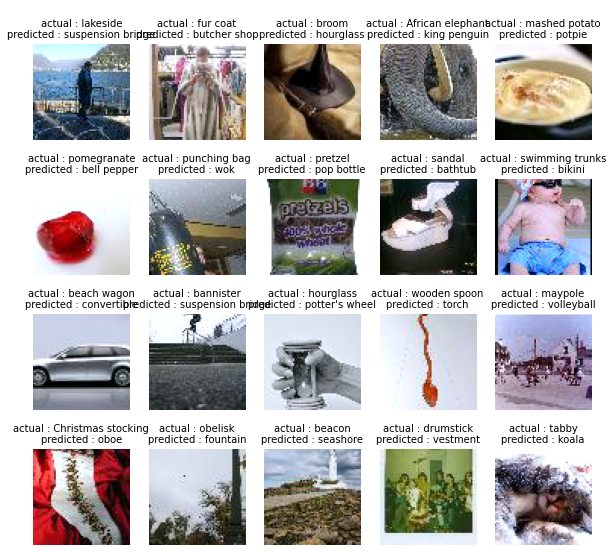

In [16]:
from utils.plot_utils import misclassified_images

images_misclassified = misclassified_images(model, test_loader, device, labels)

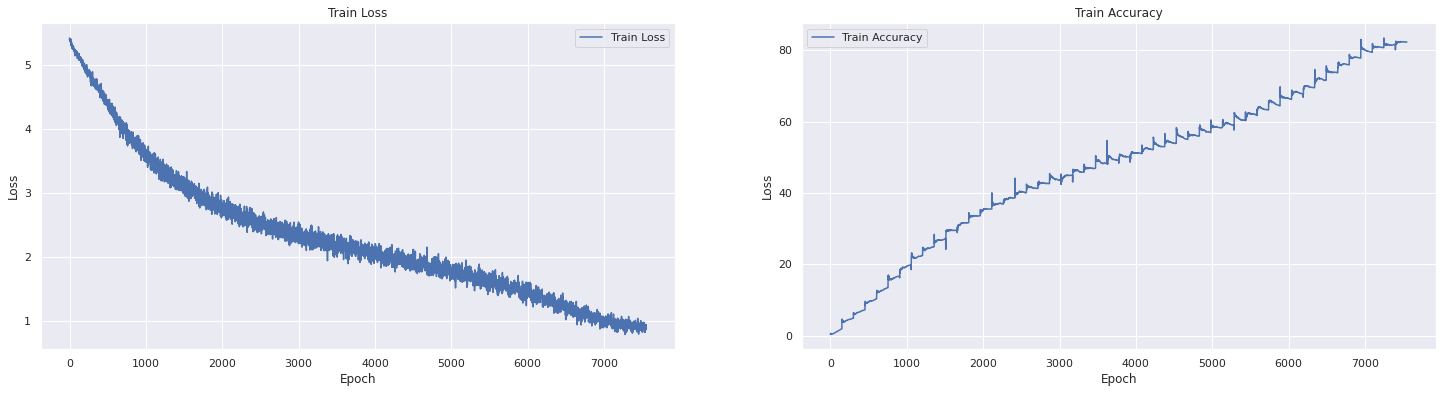

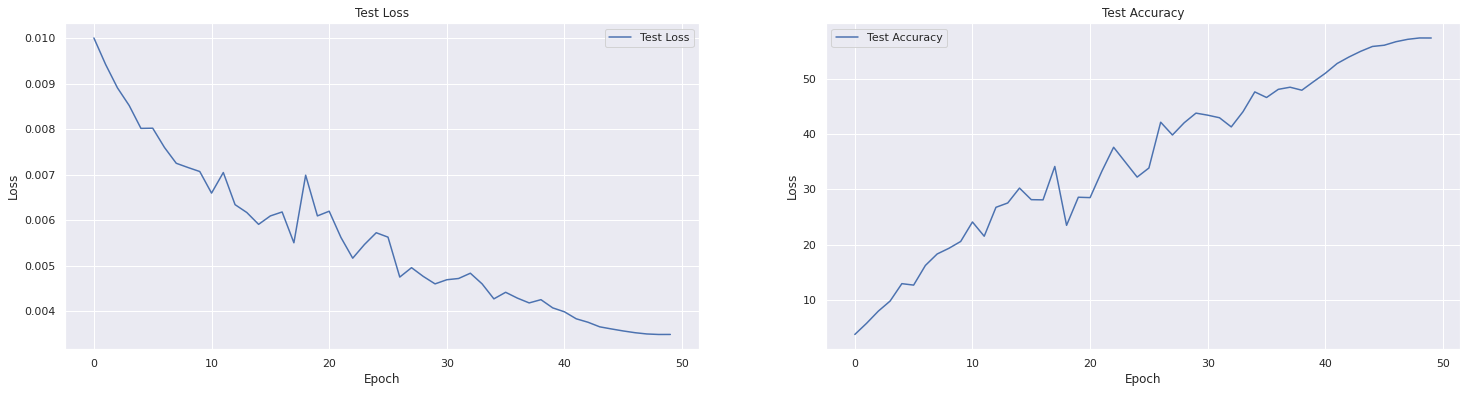

In [17]:
from utils.plot_utils import plot_metrics

plot_metrics((train_accuracy, train_losses, test_accuracy, test_losses))

In [20]:
from utils.helper import class_level_accuracy

class_level_accuracy(model, test_loader, device, labels)

Accuracy of Egyptian cat : 46 %
Accuracy of  reel : 32 %
Accuracy of volleyball : 59 %
Accuracy of rocking chair : 62 %
Accuracy of lemon : 73 %
Accuracy of bullfrog : 61 %
Accuracy of basketball : 72 %
Accuracy of cliff : 53 %
Accuracy of espresso : 76 %
Accuracy of plunger : 10 %
Accuracy of parking meter : 49 %
Accuracy of German shepherd : 61 %
Accuracy of dining table : 55 %
Accuracy of monarch : 91 %
Accuracy of brown bear : 64 %
Accuracy of school bus : 84 %
Accuracy of pizza : 80 %
Accuracy of guinea pig : 65 %
Accuracy of umbrella : 28 %
Accuracy of organ : 62 %
Accuracy of  oboe : 43 %
Accuracy of maypole : 66 %
Accuracy of goldfish : 86 %
Accuracy of potpie : 68 %
Accuracy of hourglass : 56 %
Accuracy of seashore : 61 %
Accuracy of computer keyboard : 58 %
Accuracy of Arabian camel : 60 %
Accuracy of ice cream : 43 %
Accuracy of  nail : 35 %
Accuracy of space heater : 55 %
Accuracy of cardigan : 45 %
Accuracy of baboon : 47 %
Accuracy of snail : 44 %
Accuracy of coral reef :

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Generating Grad-CAM for layer1
Generating Grad-CAM for layer2
Generating Grad-CAM for layer3
Generating Grad-CAM for layer4


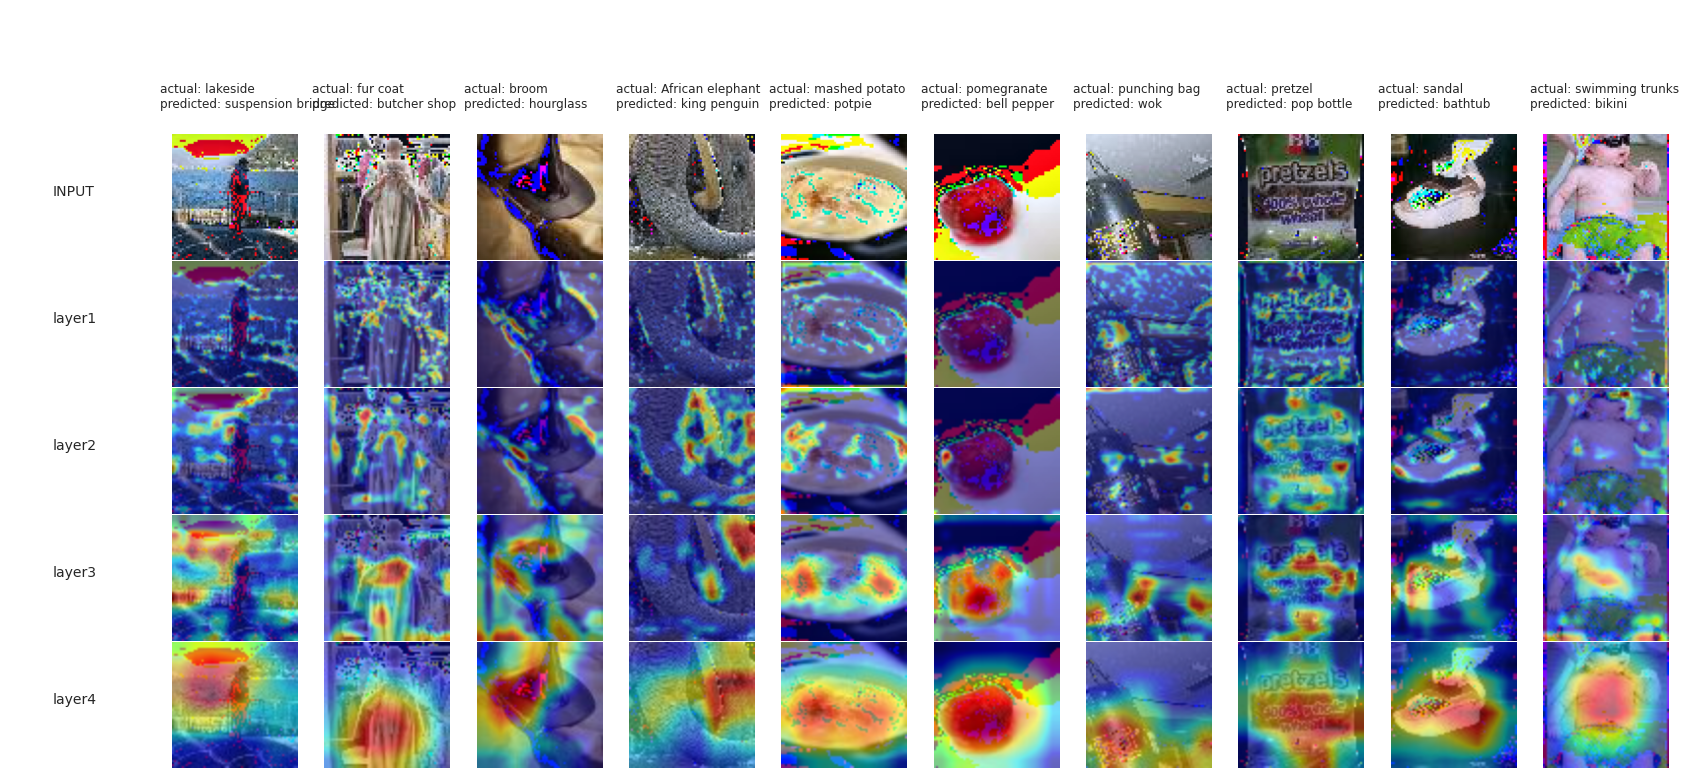

In [21]:
from utils.grad_cam import generate_gradcam, plot_gradcam

target_layers = ["layer1", "layer2", "layer3", "layer4"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[:10], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 64, 64), predicted_classes, images_misclassified[:10])